In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [228]:
train =pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train.head(4)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,model_score
0,502,0,0,0,0,0,0,0,0,0,...,13.0,14.0,NaN,NaN,NaN,NaN,0,0,1.0,0.003666
1,1,1,1,0,1,1,1,1,0,0,...,NaN,0.0,NaN,NaN,NaN,NaN,0,0,0.0,0.006602
2,2,2,2,0,2,2,1,0,0,0,...,NaN,0.0,NaN,NaN,NaN,NaN,0,0,0.0,0.006109
3,3,3,3,0,3,3,1,1,0,0,...,0.0,112.0,NaN,NaN,NaN,NaN,0,0,38.0,0.002073


In [229]:
test.head(7)

,id,C1,C2,C3,C4,C5,C6,C7,C8,C9,...,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40
0,1,378.0,265.0,1.0,2.0,45.0,4567.0,1.0,2.0,12.0,...,90.327904,0.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0
1,2,492.0,265.0,1.0,2.0,4.0,7815.0,1.0,2.0,12.0,...,0.000000,NaN,0.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0
2,3,402.0,15.0,1.0,0.0,4.0,1987.0,3.0,1.0,0.0,...,0.000000,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
3,4,21.0,1.0,23.0,0.0,1.0,79.0,1.0,1.0,0.0,...,0.000000,3.0,78.0,NaN,NaN,NaN,NaN,0.0,0.0,1.0
4,5,112.0,0.0,1.0,0.0,5.0,2971.0,2.0,2.0,0.0,...,0.000000,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
5,6,280.0,35.0,1.0,0.0,4.0,976.0,2.0,2.0,0.0,...,0.000000,14.0,404.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
6,7,243.0,6.0,3.0,0.0,4.0,769.0,2.0,2.0,0.0,...,0.000000,NaN,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0


In [230]:
Y=train['model_score']

In [231]:
train=train.drop(['model_score'],axis=1)

In [232]:
sample=pd.read_csv('sample_submission.csv')
sample.head(6)

,id,feature1,feature2,feature3,feature4,feature5
0,1,V1,V2,V3,V4,V5
1,2,V1,V2,V3,V4,V5
2,3,V1,V2,V3,V4,V5
3,4,V1,V2,V3,V4,V5
4,5,V1,V2,V3,V4,V5
5,6,V1,V2,V3,V4,V5


# Problem Statement - in this jupyter notebook we try to predict the top 5 features and predict the feature contributions from  the  x values for those top 5 features

In [233]:
###concat the train and the test dataset 
combined=pd.concat([train,test])
len(train),len(test),len(combined)

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



(442846, 14516, 457362)

In [234]:
#Filling the missing values in categorical encodings 
categorical_list=['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10']
for i in categorical_list:
    combined[i]=combined[i].fillna(-9999)

In [235]:
for i in categorical_list:
    fe=combined.groupby(i).size()/len(combined)
    combined[i]=combined[i].map(fe)

In [236]:
combined.head()

,C1,C10,C2,C3,C4,C5,C6,C7,C8,C9,...,V38,V39,V4,V40,V5,V6,V7,V8,V9,id
0,0.014848,0.748617,0.039201,0.160739,0.771354,0.000481,0.000072,0.100148,0.226436,0.884275,...,0.0,0.0,86400.0,1.0,0.0,NaN,NaN,1.0,NaN,NaN
1,0.005044,0.748617,0.072442,0.385942,0.771354,0.048244,0.001128,0.334674,0.183408,0.884275,...,0.0,0.0,86401.0,0.0,0.0,NaN,NaN,1.0,1.0,NaN
2,0.062644,0.748617,0.044597,0.008521,0.771354,0.097461,0.001743,0.334674,0.226436,0.884275,...,0.0,0.0,86469.0,0.0,0.0,NaN,NaN,1.0,1.0,NaN
3,0.010099,0.748617,0.016099,0.171455,0.771354,0.045480,0.006883,0.334674,0.183408,0.884275,...,0.0,0.0,86499.0,38.0,0.0,NaN,NaN,25.0,1.0,NaN
4,0.023802,0.055107,0.006164,0.385942,0.771354,0.048244,0.000028,0.474681,0.590156,0.884275,...,0.0,1.0,86506.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN


In [237]:
###drop the ['id'] combined dataset as it is irrevalent for the model
combined=combined.drop(['id'],axis=1)

In [238]:
all_cols=list(combined.columns)

In [239]:
##Get the list of the continous var
cont_cols=set(all_cols)-set(categorical_list)
sorted(cont_cols)

['V1',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V2',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V3',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V4',
 'V40',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9']

In [240]:
####We drop the id column from the co

In [241]:
##Filling the missing values for the 
# Or even 
for i  in  cont_cols:
    combined[i]=combined[i].fillna(combined[i].mean())

In [242]:
combined.head(7)

,C1,C10,C2,C3,C4,C5,C6,C7,C8,C9,...,V37,V38,V39,V4,V40,V5,V6,V7,V8,V9
0,0.014848,0.748617,0.039201,0.160739,0.771354,0.000481,0.000072,0.100148,0.226436,0.884275,...,0.191685,0.0,0.0,86400.0,1.0,0.0,1.038329,0.777384,1.0,1.119715
1,0.005044,0.748617,0.072442,0.385942,0.771354,0.048244,0.001128,0.334674,0.183408,0.884275,...,0.191685,0.0,0.0,86401.0,0.0,0.0,1.038329,0.777384,1.0,1.000000
2,0.062644,0.748617,0.044597,0.008521,0.771354,0.097461,0.001743,0.334674,0.226436,0.884275,...,0.191685,0.0,0.0,86469.0,0.0,0.0,1.038329,0.777384,1.0,1.000000
3,0.010099,0.748617,0.016099,0.171455,0.771354,0.045480,0.006883,0.334674,0.183408,0.884275,...,0.191685,0.0,0.0,86499.0,38.0,0.0,1.038329,0.777384,25.0,1.000000
4,0.023802,0.055107,0.006164,0.385942,0.771354,0.048244,0.000028,0.474681,0.590156,0.884275,...,0.000000,0.0,1.0,86506.0,0.0,0.0,1.000000,0.000000,1.0,1.119715
5,0.025055,0.748617,0.025411,0.171455,0.771354,0.097461,0.000352,0.334674,0.226436,0.884275,...,0.191685,0.0,0.0,86522.0,0.0,0.0,1.038329,0.777384,1.0,1.000000
6,0.062644,0.748617,0.072442,0.000975,0.771354,0.501915,0.011597,0.334674,0.226436,0.884275,...,0.191685,0.0,0.0,86529.0,0.0,0.0,1.038329,0.777384,1.0,1.000000


In [243]:
####Apply standard scaling to the continous variables 
from sklearn.preprocessing import StandardScaler
for i in cont_cols:
    scaler=StandardScaler()
    combined[i]=scaler.fit_transform(np.array(combined[i]).reshape(-1,1))


In [244]:
##Finally create the train and the test data
train=combined[:len(train)]
test=combined[len(train):len(combined)]

In [245]:
test

,C1,C10,C2,C3,C4,C5,C6,C7,C8,C9,...,V37,V38,V39,V4,V40,V5,V6,V7,V8,V9
0,0.000133,0.114522,0.109729,0.385942,0.095089,0.000151,0.000009,0.334674,0.590156,0.001839,...,3.025788e+00,-0.029184,-0.043485,-1.581228,-0.058125,-0.023140,-1.018463e-01,1.390634e-15,-0.236664,-0.195420
1,0.000206,0.114522,0.109729,0.385942,0.095089,0.501915,0.000026,0.334674,0.590156,0.001839,...,3.025788e+00,-0.029184,-0.043485,-1.581085,-0.058125,-0.023140,2.555314e+00,1.390634e-15,-0.228903,1.436957
2,0.000219,0.748617,0.078017,0.385942,0.771354,0.501915,0.000219,0.090497,0.183408,0.884275,...,-4.644240e-17,-0.045522,-0.054043,-1.581061,-0.058125,-0.046413,-5.900082e-16,1.390634e-15,-0.244424,-0.195420
3,0.029998,0.748617,0.072442,0.001828,0.771354,0.048244,0.013047,0.334674,0.183408,0.884275,...,-4.644240e-17,-0.045522,-0.054043,-1.580936,-0.032542,-0.046413,-5.900082e-16,1.390634e-15,-0.159059,-0.195420
4,0.002127,0.748617,0.039201,0.385942,0.771354,0.139747,0.000044,0.474681,0.590156,0.884275,...,-4.644240e-17,-0.045522,-0.054043,-1.580930,-0.058125,-0.046413,-5.900082e-16,1.390634e-15,-0.244424,-0.195420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14511,0.000748,0.748617,0.016099,0.171455,0.771354,0.501915,0.000706,0.474681,0.590156,0.884275,...,-4.644240e-17,-0.045522,-0.054043,1.825763,-0.058125,-0.046413,-5.900082e-16,1.390634e-15,-0.252184,-0.195420
14512,0.000682,0.748617,0.039201,0.385942,0.771354,0.139747,0.000453,0.334674,0.226436,0.884275,...,-4.644240e-17,-0.045522,-0.054043,1.826173,-0.058125,-0.046413,-5.900082e-16,1.390634e-15,-0.244424,-0.195420
14513,0.000999,0.748617,0.067607,0.171455,0.771354,0.097461,0.000789,0.474681,0.590156,0.884275,...,-4.644240e-17,-0.045522,-0.054043,1.826395,-0.058125,-0.046413,-5.900082e-16,1.390634e-15,0.593705,-0.195420
14514,0.000422,0.748617,0.078017,0.171455,0.771354,0.501915,0.000271,0.334674,0.183408,0.884275,...,-4.644240e-17,-0.045522,-0.054043,1.826548,-0.058125,-0.046413,-5.900082e-16,1.390634e-15,-0.236664,-0.195420


In [246]:
from sklearn.model_selection import train_test_split
X_train,X_valid,Y_train,Y_valid=train_test_split(train,Y,test_size=0.20,random_state=42)

In [247]:
import shap
import lightgbm as lgb


In [248]:
import lightgbm as lgb
model=lgb.LGBMRegressor()
model.fit(X_train,Y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [249]:
##Getting the metric for the validation set
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_valid)
score = mean_squared_error(Y_valid, y_pred)
print("RMSE for the validation set: {:.3f}" .format(score))


RMSE for the validation set: 0.006


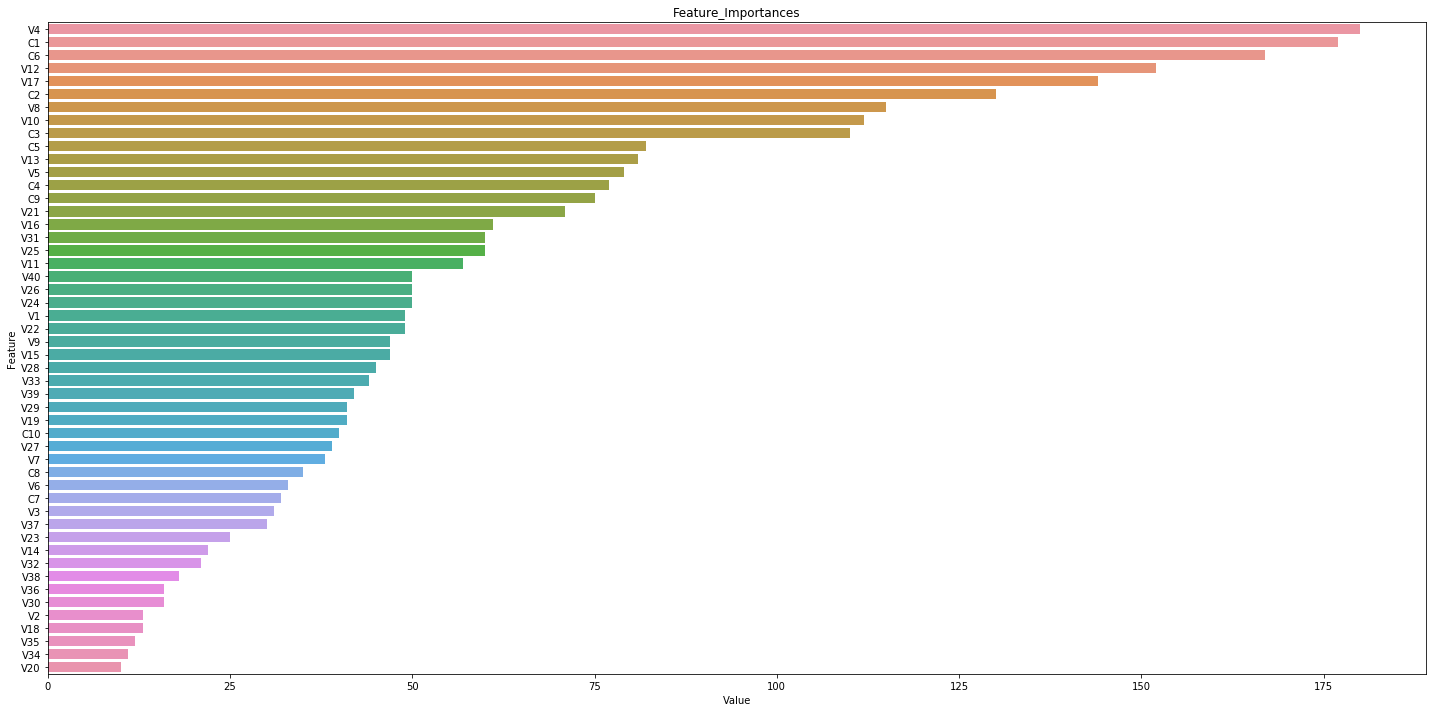

<Figure size 432x288 with 0 Axes>

In [272]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(model.feature_importances_,X_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Feature_Importances')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')

In [250]:
len(test)

14516

In [251]:
test

,C1,C10,C2,C3,C4,C5,C6,C7,C8,C9,...,V37,V38,V39,V4,V40,V5,V6,V7,V8,V9
0,0.000133,0.114522,0.109729,0.385942,0.095089,0.000151,0.000009,0.334674,0.590156,0.001839,...,3.025788e+00,-0.029184,-0.043485,-1.581228,-0.058125,-0.023140,-1.018463e-01,1.390634e-15,-0.236664,-0.195420
1,0.000206,0.114522,0.109729,0.385942,0.095089,0.501915,0.000026,0.334674,0.590156,0.001839,...,3.025788e+00,-0.029184,-0.043485,-1.581085,-0.058125,-0.023140,2.555314e+00,1.390634e-15,-0.228903,1.436957
2,0.000219,0.748617,0.078017,0.385942,0.771354,0.501915,0.000219,0.090497,0.183408,0.884275,...,-4.644240e-17,-0.045522,-0.054043,-1.581061,-0.058125,-0.046413,-5.900082e-16,1.390634e-15,-0.244424,-0.195420
3,0.029998,0.748617,0.072442,0.001828,0.771354,0.048244,0.013047,0.334674,0.183408,0.884275,...,-4.644240e-17,-0.045522,-0.054043,-1.580936,-0.032542,-0.046413,-5.900082e-16,1.390634e-15,-0.159059,-0.195420
4,0.002127,0.748617,0.039201,0.385942,0.771354,0.139747,0.000044,0.474681,0.590156,0.884275,...,-4.644240e-17,-0.045522,-0.054043,-1.580930,-0.058125,-0.046413,-5.900082e-16,1.390634e-15,-0.244424,-0.195420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14511,0.000748,0.748617,0.016099,0.171455,0.771354,0.501915,0.000706,0.474681,0.590156,0.884275,...,-4.644240e-17,-0.045522,-0.054043,1.825763,-0.058125,-0.046413,-5.900082e-16,1.390634e-15,-0.252184,-0.195420
14512,0.000682,0.748617,0.039201,0.385942,0.771354,0.139747,0.000453,0.334674,0.226436,0.884275,...,-4.644240e-17,-0.045522,-0.054043,1.826173,-0.058125,-0.046413,-5.900082e-16,1.390634e-15,-0.244424,-0.195420
14513,0.000999,0.748617,0.067607,0.171455,0.771354,0.097461,0.000789,0.474681,0.590156,0.884275,...,-4.644240e-17,-0.045522,-0.054043,1.826395,-0.058125,-0.046413,-5.900082e-16,1.390634e-15,0.593705,-0.195420
14514,0.000422,0.748617,0.078017,0.171455,0.771354,0.501915,0.000271,0.334674,0.183408,0.884275,...,-4.644240e-17,-0.045522,-0.054043,1.826548,-0.058125,-0.046413,-5.900082e-16,1.390634e-15,-0.236664,-0.195420


In [ ]:
%time test_shap_values = shap.TreeExplainer(model).shap_values(test)

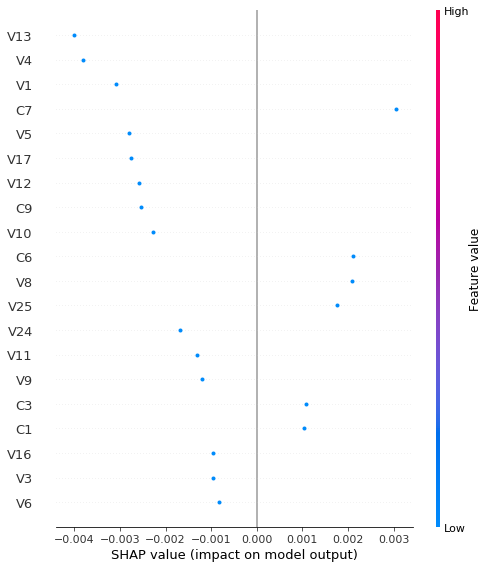

In [275]:
shap.summary_plot(test_shap_values, test)

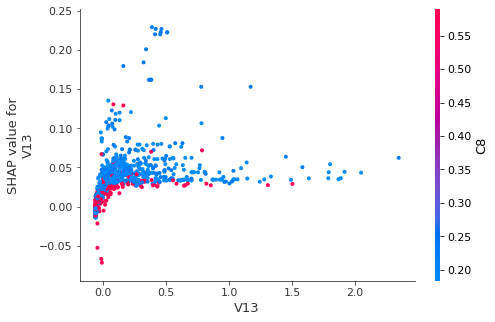

In [277]:
test_shap_values = shap.TreeExplainer(model).shap_values(test)
shap.dependence_plot("V13", test_shap_values, test)

In [253]:
test_shap=list(test_shap_values)

In [ ]:
np.array(test_shape[1]).shape

In [ ]:
test

In [255]:
feature_importance_list=[]
test_shap=shap.TreeExplainer(model).shap_values(test)
for i in range(len(test)):
    vals= np.abs(test_shap[i])
    feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['col_name','feature_importance_vals'])
    feature_importance.sort_values(by=['feature_importance_vals'],ascending=False,inplace=True)
    feature_importance_list.append(list(feature_importance['col_name'][:5]))
    if i%100==0:
        print(i)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500


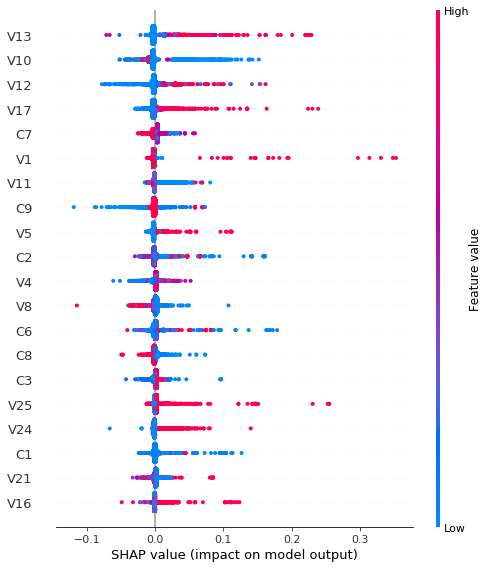

In [273]:
##Summary plot 
shap.summary_plot(test_shap, test)

In [ ]:
sample=pd.read_csv('sample_submission.csv')

In [ ]:
feature_importance_df=pd.DataFrame(feature_importance_list)

In [ ]:
sample.head(4)

In [ ]:
 for i in feature_importance_list[9]:
    print(i)

In [256]:
feature_1_list=[]
for i in range(len(test)):
    for k in feature_importance_list[i]:
        feature_1_list.append(k)
feature_2_list=[]
for i in range(len(test)):
     for k in feature_importance_list[i]:
        feature_2_list.append(k)
feature_3_list=[]
for i in range(len(test)):
     for k in feature_importance_list[i]:
        feature_3_list.append(k)
feature_4_list=[]
for i in range(len(test)):
     for k in feature_importance_list[i]:
        feature_4_list.append(k)
feature_5_list=[]
for i in range(len(test)):
    feature_5_list.append(feature_importance_list[i][4:5])

In [257]:
len(feature_1_list)


72580

In [259]:
F1=[]
F2=[]
F3=[]
F4=[]
F5=[]
for i in  range(0,len(feature_1_list),5):
    F1.append(feature_1_list[i])
for i in  range(1,len(feature_1_list),5):
    F2.append(feature_1_list[i])
for i in  range(2,len(feature_1_list),5):
    F3.append(feature_1_list[i])
for i in  range(3,len(feature_1_list),5):
    F4.append(feature_1_list[i])
for i in  range(4,len(feature_1_list),5):
    F5.append(feature_1_list[i])


In [266]:
len(F1),len(F2),len(F2),len(F3),len(F4),len(F5)

(14516, 14516, 14516, 14516, 14516, 14516)

In [268]:
sample['feature1']=F1
sample['feature2']=F2
sample['feature3']=F3
sample['feature4']=F4
sample['feature5']=F5


In [270]:
sample.to_csv('Submission.csv')